<a href="https://colab.research.google.com/github/Shreedevi-Byahatti/Class-84/blob/main/Flights_anslysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
flights_url = 'https://drive.google.com/uc?id=13XxxA7DMXH64KtdHeqWH4W6_lOVrcmOV'
airports_url = 'https://drive.google.com/uc?id=1LhmE6VUZoArDDk4bYn8AEU3dnqomCGqR'

In [5]:
flights_data = pd.read_csv(flights_url)
airports_data = pd.read_csv(airports_url)

In [6]:
flights_data.head()

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11


In [7]:
airports_data.head()

,airport_id,city,state,name
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport


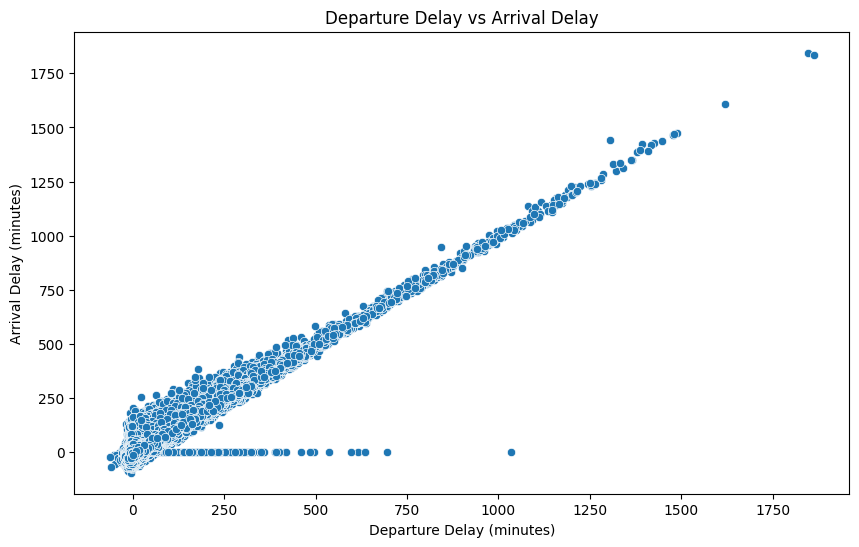

In [8]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_data, x='DepDelay', y='ArrDelay')
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

In [9]:
airport_flights = flights_data.merge(airports_data, right_on='airport_id', left_on='OriginAirportID', how='inner')

In [10]:
airport_flights.head()

,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,DepDelay,ArrDelay,airport_id,city,state,name
0,19,5,DL,11433,13303,-3,1,11433,Detroit,MI,Detroit Metro Wayne County
1,19,5,DL,14869,12478,0,-8,14869,Salt Lake City,UT,Salt Lake City International
2,19,5,DL,14057,14869,-4,-15,14057,Portland,OR,Portland International
3,19,5,DL,15016,11433,28,24,15016,St. Louis,MO,Lambert-St. Louis International
4,19,5,DL,11193,12892,-6,-11,11193,Cincinnati,OH,Cincinnati/Northern Kentucky International


In [11]:
airport_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702218 entries, 0 to 2702217
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   DayofMonth       int64 
 1   DayOfWeek        int64 
 2   Carrier          object
 3   OriginAirportID  int64 
 4   DestAirportID    int64 
 5   DepDelay         int64 
 6   ArrDelay         int64 
 7   airport_id       int64 
 8   city             object
 9   state            object
 10  name             object
dtypes: int64(7), object(4)
memory usage: 226.8+ MB


/tmp/ipython-input-12-716362441.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=airport_flights, x='Carrier', y='DepDelay', ci=None)


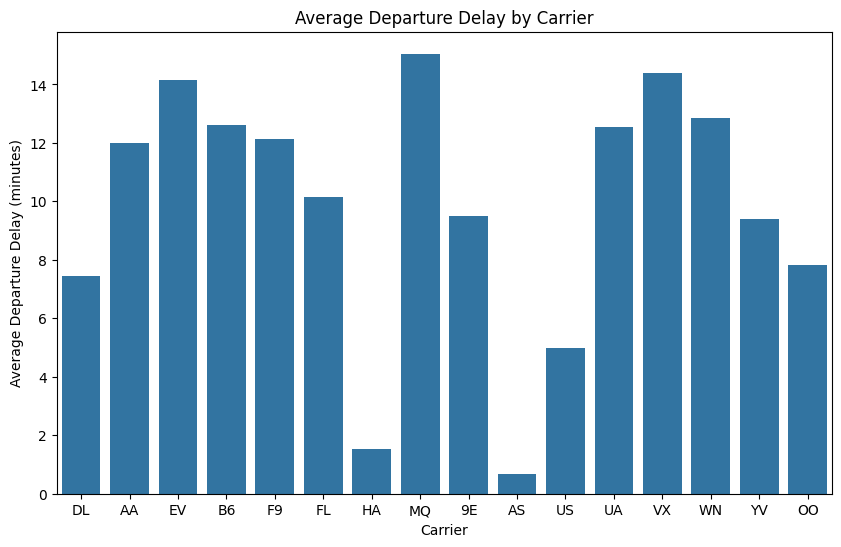

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=airport_flights, x='Carrier', y='DepDelay', ci=None)
plt.title('Average Departure Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

/tmp/ipython-input-13-450634149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airport_flights, x='state', palette='Set3')


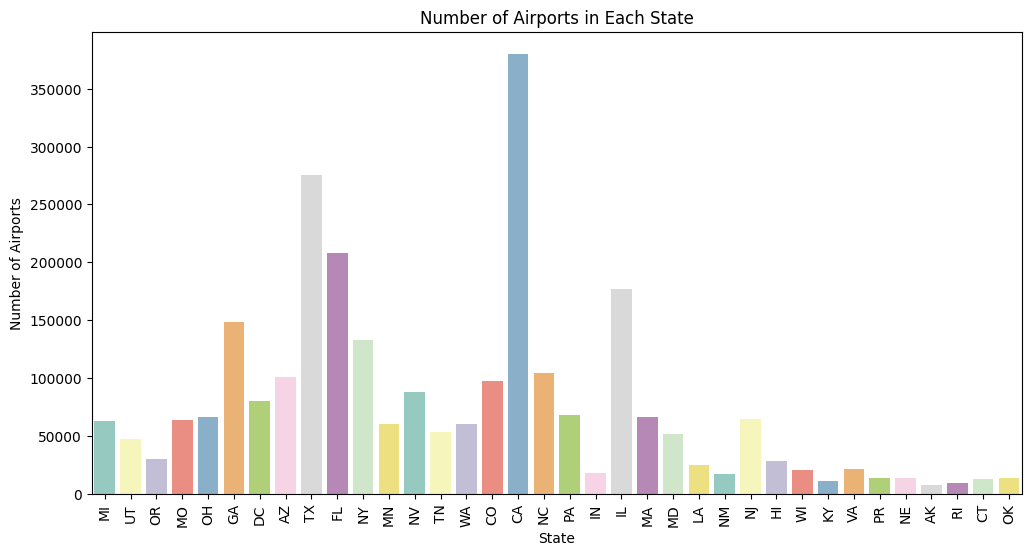

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=airport_flights, x='state', palette='Set3')
plt.title('Number of Airports in Each State')
plt.xlabel('State')
plt.ylabel('Number of Airports')
plt.xticks(rotation=90)
plt.show()

In [14]:
delay_by_airport = airport_flights.groupby('name')['DepDelay'].mean().sort_values(ascending=False).head(10)

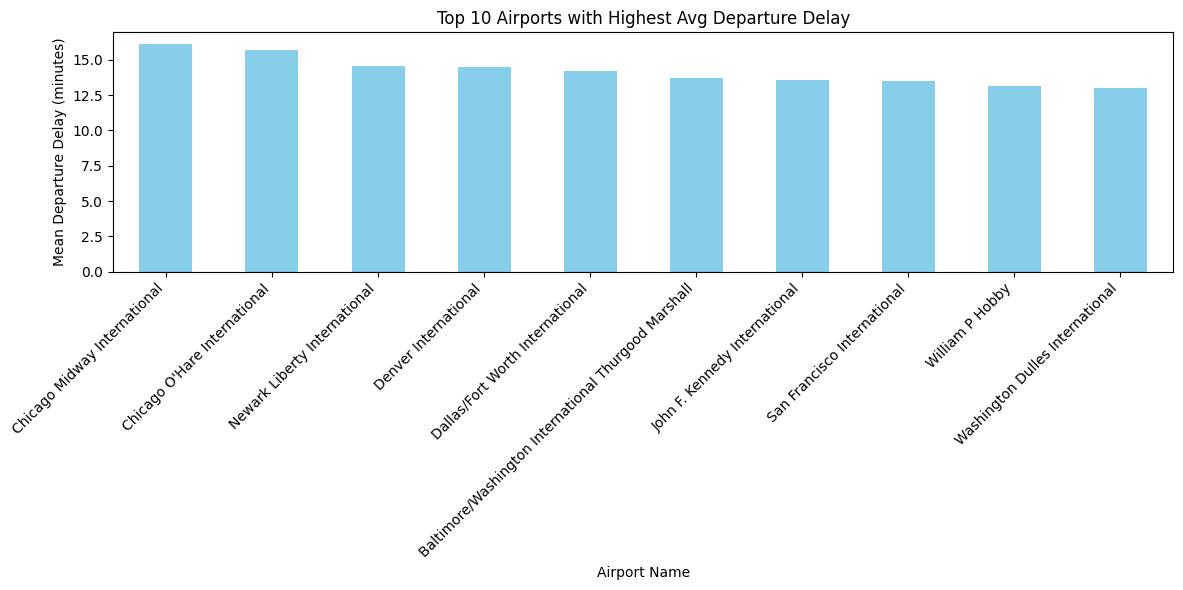

In [15]:
plt.figure(figsize=(12, 6))
delay_by_airport.plot(kind='bar', color='skyblue')
plt.title('Top 10 Airports with Highest Avg Departure Delay')
plt.xlabel('Airport Name')
plt.ylabel('Mean Departure Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
